# K-means clustering

The notebook aims to study and implement a k-means clustering using "sklearn". The iris dataset will be used to identify clusters automatically using the K-means method.


## Acknowledgments

- Used dataset: https://archive.ics.uci.edu/ml/datasets/iris

- Inquiries: mauricio.antelis@tec.mx


# Importing libraries

In [20]:
%pip install pandas
%pip install scikit-learn
%pip install seaborn


[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [21]:
# Import the packages that we will be using
import pandas as pd 
from sklearn.datasets import load_iris
import seaborn as sns



# Importing data

In [5]:
# Define the col names for the iris dataset

# Dataset url


# Load the dataset from HHDD
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = iris.target
df['species_name'] = df['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})
print(df)


     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

     species species_name  

# Undertanding and preprocessing the data

1. Get a general 'feel' of the data


In [16]:
print(df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   species  
0        0  
1        0  
2        0  
3        0  
4        0  


2. Drop rows with any missing values


In [17]:
# drop row with missing values 
df = df.dropna()

3. Encoding the class label categorical column: from string to num


In [18]:
# Encoding the categorical column

# species map to 0, 1, 2
print(df.head())
#Visualize the dataset


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   species  
0        0  
1        0  
2        0  
3        0  
4        0  


Now the label/category is numeric


4. Discard columns that won't be used


In [19]:
# # Drop out non necesary columns
df.drop(['sepal length (cm)', 'sepal width (cm)'],axis='columns',inplace=True)
#
# #Visualize the dataset
# dataset
df

,petal length (cm),petal width (cm),species
0,1.4,0.2,0
1,1.4,0.2,0
2,1.3,0.2,0
3,1.5,0.2,0
4,1.4,0.2,0
...,...,...,...
145,5.2,2.3,2
146,5.0,1.9,2
147,5.2,2.0,2
148,5.4,2.3,2


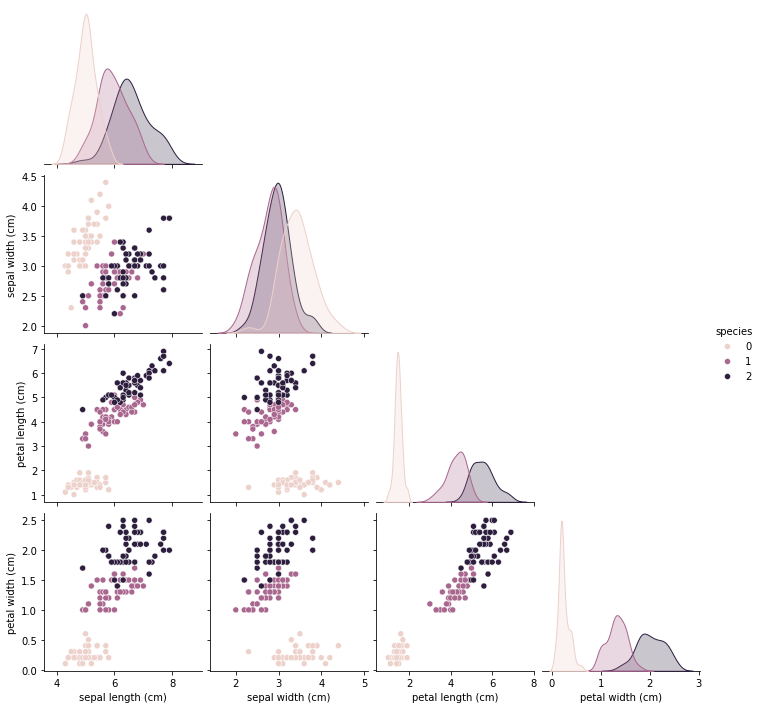

In [53]:
# Reset plot 

df = load_iris() 
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = iris.target

sns.pairplot(df, corner = True, diag_kind='kde')

In [34]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


5. Scatter plot of the data

<AxesSubplot: xlabel='petal length (cm)', ylabel='petal width (cm)'>

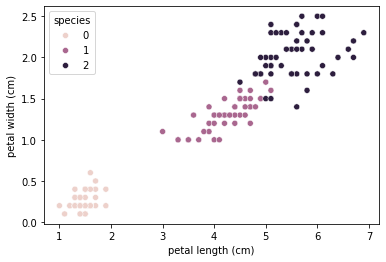

In [26]:
sns.scatterplot(x='petal length (cm)', y='petal width (cm)', data=df, hue='species')

6. Scatter plot of the data asigning each point to the cluster it belongs to ¡¡

In [29]:
df.head()

,petal length (cm),petal width (cm),species
0,1.4,0.2,0
1,1.4,0.2,0
2,1.3,0.2,0
3,1.5,0.2,0
4,1.4,0.2,0


In [35]:
# Get dataframes for each real cluster
setosa = df[df['species'] == 0]
versicolor = df[df['species'] == 1]
virginica = df[df['species'] == 2]

print(setosa)
print(versicolor)
print(virginica)

    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                 5.1               3.5                1.4               0.2   
1                 4.9               3.0                1.4               0.2   
2                 4.7               3.2                1.3               0.2   
3                 4.6               3.1                1.5               0.2   
4                 5.0               3.6                1.4               0.2   
5                 5.4               3.9                1.7               0.4   
6                 4.6               3.4                1.4               0.3   
7                 5.0               3.4                1.5               0.2   
8                 4.4               2.9                1.4               0.2   
9                 4.9               3.1                1.5               0.1   
10                5.4               3.7                1.5               0.2   
11                4.8               3.4 

Recall that for this dataset we know in advance the class to which each point belongs to

# Kmeans clustering

Kmeans clustering

In [36]:
# Import sklearn KMeans
from sklearn.cluster import KMeans
# Define number of clusters
cluster_num = 3

# Do K-means clustering (assing each point in the dataset to a cluster)
kmeans = KMeans(n_clusters=cluster_num).fit(df[['petal length (cm)', 'petal width (cm)']])
# Get the cluster centroids
centroids = kmeans.cluster_centers_
# Get the cluster labels
df['cluster'] = kmeans.labels_


# Print estimated cluster of each point in the dataset
print(df)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

     species  cluster  
0  

NOTE: the lables of the estimated clusters do not agree with the lables in the real labels, therefore, it will be important to pair the labels of the real and estimated clusters

In [37]:
# Manual pairing the labels of the real and estimated clusters
df['cluster'] = df['cluster'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

In [38]:
# Add a new column to the dataset with the cluster information
df['cluster'] = kmeans.labels_

In [39]:
# Laber of the estimated clusters
df['cluster'] = df['cluster'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

In [40]:
# Cluster centroides
centroids = pd.DataFrame(centroids, columns = ['petal length (cm)', 'petal width (cm)'])

In [41]:
# Sum of squared error (sse) of the final model
print(kmeans.inertia_)

31.371358974358973


In [42]:
# The number of iterations required to converge
print(kmeans.n_iter_)

5


<span style='color:Blue'> **Important remarks**  </span>

- The number of each cluster is randomly assigned
- The order of the numer in each cluster is random

# Plot estimated clusters

Plot estimated clusters

<AxesSubplot: xlabel='petal length (cm)', ylabel='petal width (cm)'>

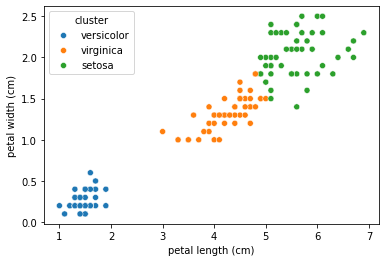

In [48]:

# plot the clusters
sns.scatterplot(x='petal length (cm)', y='petal width (cm)', data=df, hue='cluster')


## Plot both real and estimated clusters to check for errors

<AxesSubplot: xlabel='petal length (cm)', ylabel='petal width (cm)'>

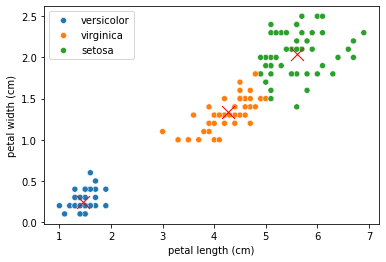

In [50]:
# plot the centroids
sns.scatterplot(x='petal length (cm)', y='petal width (cm)', data=df, hue='cluster')

sns.scatterplot(x=centroids['petal length (cm)'], y=centroids['petal width (cm)'], color='red', marker='x', s=169)


# Selecting K: elbow plot

Check the acurracy of the model using k-fold cross-validation

In [45]:
# Intialize a list to hold sum of squared error (sse)
sse = []
# Define values of k
k_rng = range(1,10)


# For each k
for k in k_rng:
    # Initialize KMeans
    km = KMeans(n_clusters=k)
    # Fit on the data
    km.fit(df[['petal length (cm)', 'petal width (cm)']])
    # Append sse value to list
    sse.append(km.inertia_)


<AxesSubplot: >

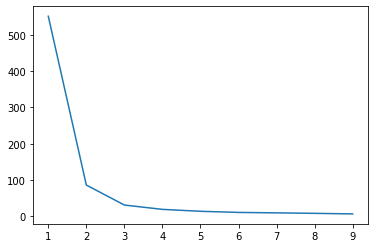

In [46]:
# Plot sse versus k
sns.lineplot(x=k_rng, y=sse)

Choose the k after which the sse is minimally reduced


<span style='color:Blue'> **Important remarks**  </span>

- Note that for K=2 ...
- Note that for K=3 ...



# Final remarks

- The number of each cluster need to be assigned assigned

- The order of the number in each cluster is random

- If there is no information about the number of clusters k, then use the elbow plot method to choose the best number of clusters k